# K-Means Clustering
``` text
k-means clustering is an unsupervised machine learning algorithm 
that seeks to segment a dataset into groups based on the similarity of datapoints.
An unsupervised model has independent variables and no dependent variables.
If the points in this dataset belong to distinct groups with attributes significantly varying between groups but not within,
the points should form clusters when plotted.
```
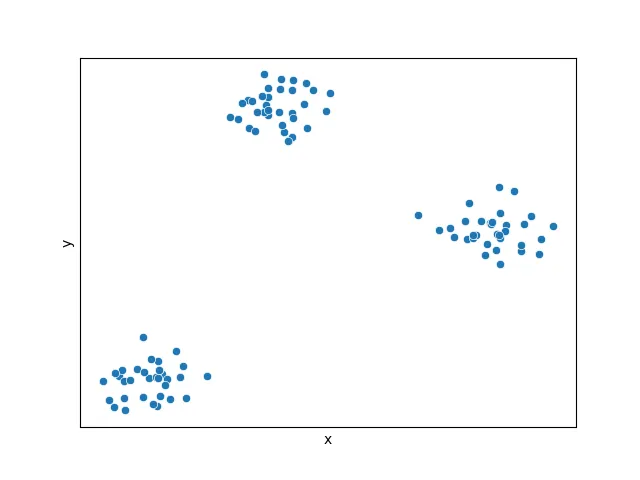

``` text
This dataset clearly displays 3 distinct classes of data. If we seek to assign a new data point to one of these three groups,
it can be done by finding the midpoint of each group (centroid) and selecting the nearest centroid as the group of the unassigned data point.
```

# Algorithm
``` text
For a given dataset, k is specified to be the number of distinct groups the points belong to. These k centroids are first randomly initialized, then iterations are performed to optimize the locations of these k centroids as follows:

The distance from each point to each centroid is calculated.
Points are assigned to their nearest centroid.
Centroids are shifted to be the average value of the points belonging to it. If the centroids did not move, the algorithm is finished, else repeat.```


# Maths Behind K-Means
``` text
Our basic goal in any machine learning algorithm is to reduce the cost function.
In the case of K-Means Clustering, the cost function is the sum of Euclidean distances from points to their nearby cluster centroids. 
The formula for Euclidean distance is given by  The objective function for K-Means is given by : 
```
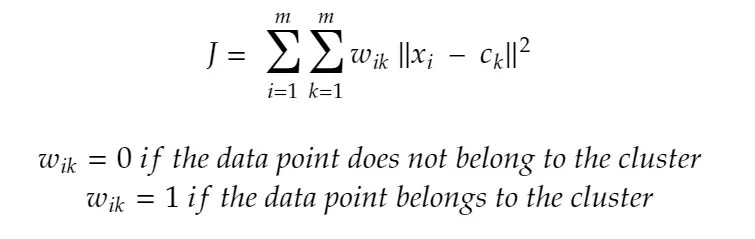

```text
Now we need to minimize J to reach the optimal value.
So basically we are going to differentiate J with respect to 2 variables one after the other.
In the first method, I will be treating ck as fixed and vary wik and the results are as follows:
```

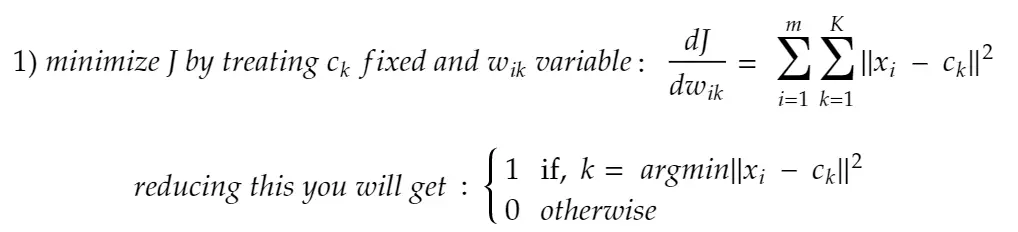

```text
In this step, as you can see, the data point xi is assigned to the closest centroid ci with respect to Euclidean distance.
In the second part,
you will be getting the following result:
```

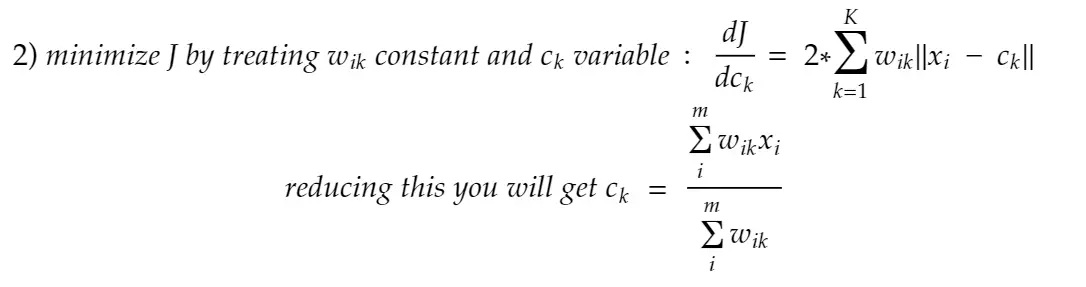

```text
This step is carried out to recompute the centroid of the cluster after the data points are assigned. 
The above two steps will be carried out iteratively until we get the optimal segregation of data points.
One of the few things that you need to keep in mind is that as we are using euclidean distance as the main parameter,
it will be better to standardize your dataset if the x and y vary way too much like 10 and 100.
```

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# using the make_blobs dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=5, random_state=101)
# setting the number of training examples
m=X.shape[0]
n=X.shape[1] 
n_iter=50

In [50]:
y

array([3, 1, 4, 3, 0, 0, 2, 4, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 4, 0, 4, 3,
       4, 0, 0, 3, 1, 3, 4, 0, 1, 2, 4, 1, 1, 4, 3, 3, 1, 0, 2, 4, 0, 0,
       2, 4, 3, 1, 1, 1, 3, 3, 2, 4, 1, 3, 0, 2, 4, 4, 1, 3, 2, 2, 4, 0,
       3, 4, 1, 3, 4, 3, 2, 3, 2, 0, 2, 3, 1, 2, 1, 4, 2, 4, 3, 2, 2, 0,
       1, 2, 4, 0, 3, 2, 1, 4, 3, 2, 2, 0])

* I have set the K value to be 5 as before and also initialized the centroids randomly at first using the random.randint() function

In [51]:
# computing the initial centroids randomly
K=5
import random

# creating an empty centroid array
centroids=np.array([]).reshape(n,0) 

# creating 5 random centroids
for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]

* Then I am going to find the distance between the points. Euclidean distance is most commonly used for finding the similarity.

In [52]:
output={}

# creating an empty array
euclid=np.array([]).reshape(m,0)

# finding distance between for each centroid
for k in range(K):
       dist=np.sum((X-centroids[:,k])**2,axis=1)
       euclid=np.c_[euclid,dist]

# storing the minimum value we have computed
minimum=np.argmin(euclid,axis=1)+1

* I have also stored all the minimum values in a variable minimum. Then I regrouped the dataset based on the minimum values we got and calculated the centroid value.

In [53]:
# computing the mean of separated clusters
cent={}
for k in range(K):
    cent[k+1]=np.array([]).reshape(2,0)

# assigning of clusters to points
for k in range(m):
    cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]
for k in range(K):
    cent[k+1]=cent[k+1].T

# computing mean and updating it
for k in range(K):
     centroids[:,k]=np.mean(cent[k+1],axis=0)

* Then we need to repeat the above 2 steps over and over again until we reach the convergence.

In [54]:
# repeating the above steps again and again
for i in range(n_iter):
      euclid=np.array([]).reshape(m,0)
      for k in range(K):
          dist=np.sum((X-centroids[:,k])**2,axis=1)
          euclid=np.c_[euclid,dist]
      C=np.argmin(euclid,axis=1)+1
      cent={}
      for k in range(K):
           cent[k+1]=np.array([]).reshape(2,0)
      for k in range(m):
           cent[C[k]]=np.c_[cent[C[k]],X[k]]
      for k in range(K):
           cent[k+1]=cent[k+1].T
      for k in range(K):
           centroids[:,k]=np.mean(cent[k+1],axis=0)
      final=cent    

* This is the plot of original dataset and you can visually see that there are 5 clusters in the dataset

Text(0.5, 1.0, 'Original Dataset')

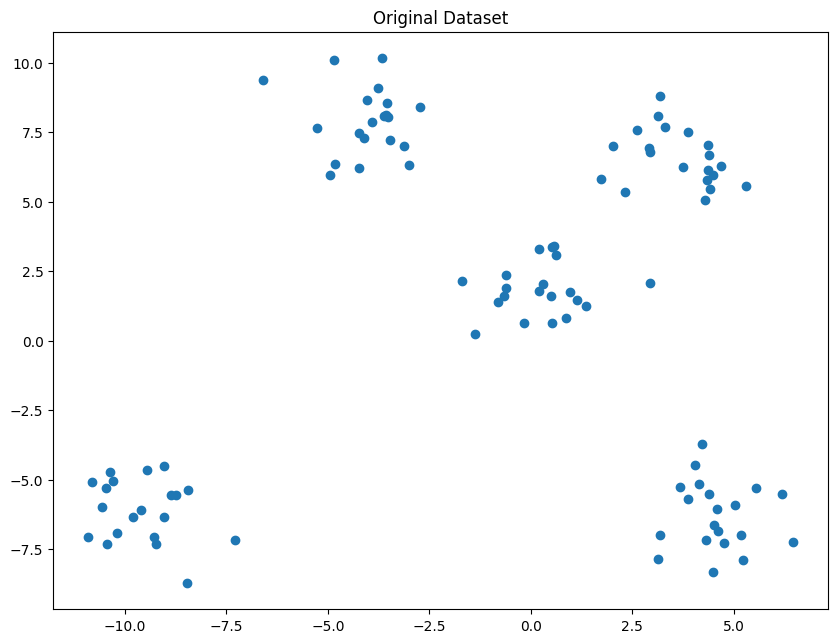

In [55]:
plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Original Dataset')

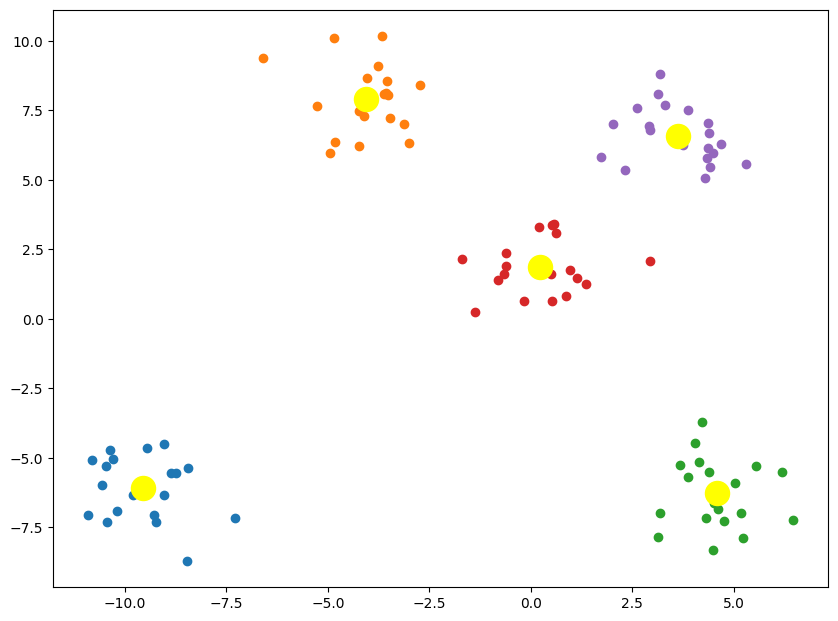

In [56]:
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()